In [1]:
## Basic chatbot with langgraph
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages ##reducers
from langgraph.graph import MessagesState

In [3]:
class State(TypedDict):
    # Messages have the type "list".
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [4]:
graph_builder

In [5]:
from langchain_groq import ChatGroq


In [6]:
llm = ChatGroq(model="gemma2-9b-it")

In [7]:
## Node functionality
def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

In [8]:
graph_builder=StateGraph(State)
graph_builder.add_node("llmchatbot", chatbot)
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# compile
graph = graph_builder.compile()

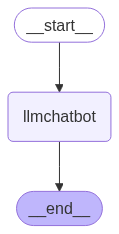

In [9]:
## Visualize
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [10]:
##how to run it
graph.invoke({"messages":"Hi"})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='1f71104e-95f1-4448-a3eb-92eb620643d3'),
  AIMessage(content='Hi! 👋  How can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 0.00118105, 'queue_time': 0.25782652, 'total_time': 0.026635595}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--665fe08c-9dae-4c3b-bd06-b598fd2dd483-0', usage_metadata={'input_tokens': 10, 'output_tokens': 14, 'total_tokens': 24})]}

In [11]:
## alternate initialization

def chatbot1(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"])]}

In [13]:
gb1=StateGraph(State)
gb1.add_node("llmchatbot1", chatbot1)
gb1.add_edge(START, "llmchatbot1")
gb1.add_edge("llmchatbot1", END)

# compile
graph1 = gb1.compile()

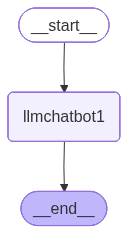

In [14]:
## Visualize
from IPython.display import Image, display

try:
    display(Image(graph1.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [15]:
graph1.invoke({"messages":"Hi"})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='b30dd87e-f990-466d-8ec6-ff7ba525ac99'),
  AIMessage(content='Hi! 👋  \n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 0.001175109, 'queue_time': 0.2483049, 'total_time': 0.0320842}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c3e4158c-2eb6-4d87-8756-100bf61449f7-0', usage_metadata={'input_tokens': 10, 'output_tokens': 17, 'total_tokens': 27})]}

In [16]:
for event in graph.stream({"messages":"Hi, who is Trump?"}):
    for value in event.values():
        print(value["messages"][-1].content)

Donald John Trump is an American businessman, media personality, and politician who served as the 45th president of the United States from 2017 to 2021. 

Here are some key facts about him:

* **Business Career:** Before entering politics, Trump was a prominent real estate developer and investor, known for building skyscrapers and casinos. He also owned the Miss Universe and Miss USA beauty pageants.
* **Media Personality:** Trump gained widespread fame through his television reality show, "The Apprentice," where he served as the host and executive producer.
* **Political Career:** Trump entered politics as a Republican and ran for president in 2016. His campaign focused on populist themes and promises to "make America great again." He won the election, defeating Democratic nominee Hillary Clinton. His presidency was marked by controversy and political division.
* **Post-Presidency:** After leaving office, Trump remains a influential figure in the Republican Party and continues to be a

In [18]:
@tool
def multi(a:int, b:int)-> int:
    """Multiply a and b

    Args:
        a(int): first int
        b(int): second int
    Returns:
        int: output int
    """
    return a*b


In [17]:
from langchain_core.tools import tool
from langgraph.types import interrupt, Command


@tool
def human_assistance(query:str) -> str:
    """request assistance from a human"""
    human_response=interrupt({"query": query})
    return human_response["data"]

In [20]:
human_response = ("we are here to help. checkout langgraph to build your agent")

human_command = Command(resume={"data": human_response})

events = graph.stream(human_command, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()


RuntimeError: Cannot use Command(resume=...) without checkpointer